# 10장

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target==0).astype(np.int8)

per_clf = Perceptron()
per_clf.fit(X, y)

print(per_clf.predict([[2, 0.5]]))

[0]


In [2]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_train_full.dtype)

X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(60000, 28, 28) uint8


In [3]:
# 모델에 대해 설명

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

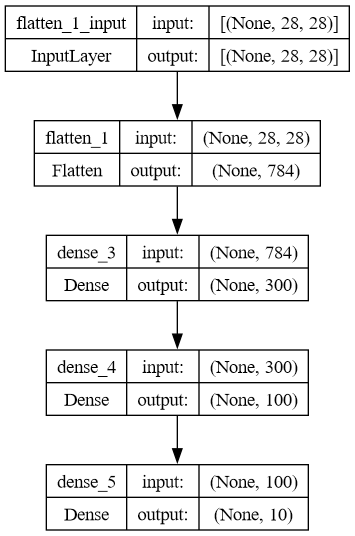

In [4]:
keras.utils.plot_model(model, show_shapes=True)

In [5]:
print(model.layers)
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer(hidden1.name) is hidden1) # 'dense_3'

weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[<keras.layers.reshaping.flatten.Flatten object at 0x00000198EF692CD0>, <keras.layers.core.dense.Dense object at 0x00000198A35A4AF0>, <keras.layers.core.dense.Dense object at 0x00000198A35A43A0>, <keras.layers.core.dense.Dense object at 0x00000198A35A4BE0>]
dense_3
True
[[ 0.01810907  0.03270105  0.00053599 ...  0.06954935 -0.02825245
   0.0218119 ]
 [ 0.01904559 -0.07290886  0.03287584 ...  0.05035535  0.07028891
   0.03622398]
 [-0.04279027  0.0048151  -0.00191558 ...  0.04094204  0.03301985
   0.00810593]
 ...
 [ 0.02289183 -0.06622813 -0.05060604 ... -0.03522745 -0.06667377
  -0.01733506]
 [ 0.00534651  0.0421147  -0.01496943 ...  0.05834679  0.03565795
  -0.01132021]
 [ 0.00217424 -0.04119496 -0.03345918 ... -0.06272227 -0.06410856
  -0.07413192]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 컴파일에 대해 설명

In [7]:
history = model.fit(X_train, y_train, batch_size=1028, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
54/54 [==============================] - 2s 7ms/step - loss: 1.9365 - accuracy: 0.3995 - val_loss: 1.5531 - val_accuracy: 0.6322
Epoch 2/30
54/54 [==============================] - 0s 4ms/step - loss: 1.3514 - accuracy: 0.6496 - val_loss: 1.1622 - val_accuracy: 0.6828
Epoch 3/30
54/54 [==============================] - 0s 4ms/step - loss: 1.0772 - accuracy: 0.6870 - val_loss: 0.9761 - val_accuracy: 0.7084
Epoch 4/30
54/54 [==============================] - 0s 4ms/step - loss: 0.9359 - accuracy: 0.7130 - val_loss: 0.8726 - val_accuracy: 0.7320
Epoch 5/30
54/54 [==============================] - 0s 4ms/step - loss: 0.8507 - accuracy: 0.7353 - val_loss: 0.8043 - val_accuracy: 0.7486
Epoch 6/30
54/54 [==============================] - 0s 4ms/step - loss: 0.7927 - accuracy: 0.7519 - val_loss: 0.7549 - val_accuracy: 0.7618
Epoch 7/30
54/54 [==============================] - 0s 4ms/step - loss: 0.7504 - accuracy: 0.7616 - val_loss: 0.7191 - val_accuracy: 0.7698
Epoch 8/30
54/54 [==

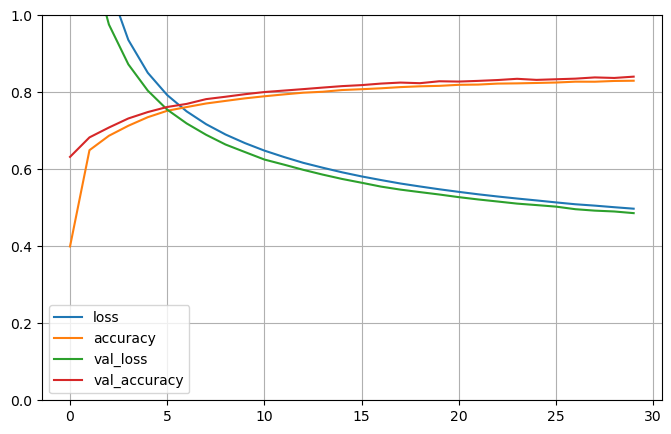

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show(block=False)
plt.pause(2)
plt.close()

In [9]:
print(model.evaluate(X_test, y_test))
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

313/313 [==============================] - 1s 3ms/step - loss: 0.5241 - accuracy: 0.8211
[0.5241090655326843, 0.8210999965667725]
1/1 [==============================] - 0s 75ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.2 , 0.01, 0.66],
       [0.  , 0.  , 0.86, 0.  , 0.02, 0.  , 0.12, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [10]:
y_pred = np.argmax(y_proba, axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8177 - val_loss: 0.5038
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5091 - val_loss: 0.4487
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6089 - val_loss: 0.4418
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7008 - val_loss: 0.4291
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0355 - val_loss: 0.4194
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4374 - val_loss: 0.4069
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4264 - val_loss: 0.3986
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4183 - val_loss: 0.3925
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4098 - val_loss: 0.3984
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4056 - val_loss: 0.3836

In [13]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile('SGD', 'mse')

model.fit(X_train, y_train, 1028, 20, validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

Epoch 1/20
12/12 [==============================] - 0s 11ms/step - loss: 3.7797 - val_loss: 1.6773
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 1.5402 - val_loss: 1.0310
Epoch 3/20
12/12 [==============================] - 0s 7ms/step - loss: 1.0241 - val_loss: 0.8638
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 0.8792 - val_loss: 0.7960
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 0.8097 - val_loss: 0.7597
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 0.7722 - val_loss: 0.7342
Epoch 7/20
12/12 [==============================] - 0s 7ms/step - loss: 0.7472 - val_loss: 0.7144
Epoch 8/20
12/12 [==============================] - 0s 7ms/step - loss: 0.7272 - val_loss: 0.6982
Epoch 9/20
12/12 [==============================] - 0s 7ms/step - loss: 0.7107 - val_loss: 0.6841
Epoch 10/20
12/12 [==============================] - 0s 6ms/step - loss: 0.6960 - val_loss: 0.6715
Epoch 11/20
12/12 

0.6035476326942444

In [14]:
input_A = keras.layers.Input(shape=[5], name='wide_input')  # short_path
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=output)

model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 5.4822 - val_loss: 2.1371
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.4946 - val_loss: 0.9674
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8497 - val_loss: 0.6935
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6860 - val_loss: 0.6168
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6339 - val_loss: 0.5884
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6107 - val_loss: 0.5730
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5965 - val_loss: 0.5621
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5859 - val_loss: 0.5539
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5780 - val_loss: 0.5466
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5713 - val_loss: 0.5404

In [15]:
input_A = keras.layers.Input(shape=[5], name='wide_input')  # short_path
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20,
                    validation_data=((X_valid_A, X_valid_B), [y_valid, y_valid]))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])
print(total_loss, main_loss, aux_loss)

y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(y_pred_main, y_pred_aux, sep='\n\n')

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 4.0329 - main_output_loss: 3.8881 - aux_output_loss: 5.3365 - val_loss: 2.1583 - val_main_output_loss: 1.9383 - val_aux_output_loss: 4.1379
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 1.6154 - main_output_loss: 1.3943 - aux_output_loss: 3.6051 - val_loss: 1.1475 - val_main_output_loss: 0.9411 - val_aux_output_loss: 3.0051
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0205 - main_output_loss: 0.8306 - aux_output_loss: 2.7296 - val_loss: 0.8532 - val_main_output_loss: 0.6841 - val_aux_output_loss: 2.3752
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8357 - main_output_loss: 0.6783 - aux_output_loss: 2.2520 - val_loss: 0.7577 - val_main_output_loss: 0.6164 - val_aux_output_loss: 2.0286
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7661 - main_output_loss: 0.6327 - aux_output_loss: 1.9662 - val_loss

In [16]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])
print(total_loss, main_loss, aux_loss)

y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(y_pred_main, y_pred_aux, sep='\n\n')

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 2.2364 - output_1_loss: 2.0510 - output_2_loss: 3.9052 - val_loss: 1.0944 - val_output_1_loss: 0.8964 - val_output_2_loss: 2.8761
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.9637 - output_1_loss: 0.8036 - output_2_loss: 2.4043 - val_loss: 0.8554 - val_output_1_loss: 0.7293 - val_output_2_loss: 1.9905
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.8321 - output_1_loss: 0.7193 - output_2_loss: 1.8473 - val_loss: 0.7825 - val_output_1_loss: 0.6858 - val_output_2_loss: 1.6528
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.7754 - output_1_loss: 0.6833 - output_2_loss: 1.6047 - val_loss: 0.7417 - val_output_1_loss: 0.6571 - val_output_2_loss: 1.5030
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.7416 - output_1_loss: 0.6583 - output_2_loss: 1.4919 - val_loss: 0.7146 - val_output_1_loss: 0.6361 - val_ou

In [17]:
input_A = keras.layers.Input(shape=[5], name='wide_input')  # short_path
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, input_B])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20,
                    validation_data=((X_valid_A, X_valid_B), [y_valid, y_valid]))

model.save('my_keras_model.h5')
model = keras.models.load_model('my_keras_model.h5')
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(y_pred_main, y_pred_aux, sep='\n\n')

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 4.4766 - main_output_loss: 4.4227 - aux_output_loss: 4.9622 - val_loss: 2.4485 - val_main_output_loss: 2.2555 - val_aux_output_loss: 4.1854
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 1.8313 - main_output_loss: 1.6241 - aux_output_loss: 3.6960 - val_loss: 1.2827 - val_main_output_loss: 1.0752 - val_aux_output_loss: 3.1503
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 1.1297 - main_output_loss: 0.9421 - aux_output_loss: 2.8176 - val_loss: 0.9242 - val_main_output_loss: 0.7561 - val_aux_output_loss: 2.4369
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8925 - main_output_loss: 0.7436 - aux_output_loss: 2.2320 - val_loss: 0.7879 - val_main_output_loss: 0.6558 - val_aux_output_loss: 1.9769
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7922 - main_output_loss: 0.6726 - aux_output_loss: 1.8688 - val_loss

In [18]:
# # API 모델
# model.save(path + model_name.h5)
# model = keras.models.load_model(path + model_name.h5)

# # 서브클래싱 모델
# # 모델 전체 저장
# model.save(path + dir_name, save_format='tf')
# model = keras.models.load_model(path + dir_name, custom_objects={'SubClassing': SubClassing})

# # 모델 가중치 저장 ※ 확장자는 ckpt
# model.save_weights(path + model_name.ckpt)
# # 동일한 구조로 모델 정의
# model = SubClassing()
# model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer='SGD')
# model.load_weights(path + model_name.ckpt)

# # 확장자를 h5를 썼을 경우에는 fit을 해야지만 load 가능 내부 변수 어쩌구하는데 이유는 모름. gpt도 모름
# model.save_weights(path + model_name.h5)
# # 동일한 구조로 모델 정의
# model = SubClassing()
# model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer='SGD')
# # 최소 조건으로 fit
# history = model.fit((X_train_A[:1], X_train_B[:1]), (y_train[:1], y_train[:1]), epochs=1)
# # 가중치 로드
# model.load_weights(path + model_name.h5)

# y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
# print(y_pred_main, y_pred_aux, sep='\n\n')

In [19]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('\nval/train: {:.2f}'.format(logs['val_loss']/logs['loss']))

# 아래의 함수를 이용해서 callback 생성 가능
# on_batch_begin, on_batch_end, 
# on_epoch_begin, on_epoch_end, 
# on_predict_batch_begin, on_predict_batch_end, on_predict_begin, on_predict_end,
# on_test_batch_begin, on_test_batch_end, on_test_begin, on_test_end,
# on_train_batch_begin, on_train_batch_end, on_train_begin, on_train_end,

In [20]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.ckpt')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
custom_callback = PrintValTrainRatioCallback()

history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=100,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)),
                    callbacks=[checkpoint_cb, early_stopping_cb, custom_callback])
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), [y_test, y_test])
print(total_loss, main_loss, aux_loss)

y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(y_pred_main, y_pred_aux, sep='\n\n')

Epoch 1/100
360/363 [============================>.] - ETA: 0s - loss: 2.6420 - output_1_loss: 2.4790 - output_2_loss: 4.1089INFO:tensorflow:Assets written to: my_keras_model.ckpt\assets

val/train: 0.49
363/363 [==============================] - 4s 10ms/step - loss: 2.6329 - output_1_loss: 2.4696 - output_2_loss: 4.1028 - val_loss: 1.2831 - val_output_1_loss: 1.1028 - val_output_2_loss: 2.9057
Epoch 2/100
358/363 [============================>.] - ETA: 0s - loss: 1.0772 - output_1_loss: 0.9373 - output_2_loss: 2.3367INFO:tensorflow:Assets written to: my_keras_model.ckpt\assets

val/train: 0.81
363/363 [==============================] - 4s 10ms/step - loss: 1.0728 - output_1_loss: 0.9334 - output_2_loss: 2.3274 - val_loss: 0.8699 - val_output_1_loss: 0.7618 - val_output_2_loss: 1.8428
Epoch 3/100
363/363 [==============================] - ETA: 0s - loss: 0.8273 - output_1_loss: 0.7298 - output_2_loss: 1.7048INFO:tensorflow:Assets written to: my_keras_model.ckpt\assets

val/train: 0.90


In [1]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")

    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2024_08_14-10_59_28'

In [22]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# 텐서보드 콜백
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit((X_train_A, X_train_B), (y_train, y_train), batch_size=1028, epochs=30,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)),
                    callbacks=[tensorboard_cb])

Epoch 1/30
12/12 [==============================] - 1s 33ms/step - loss: 5.8198 - output_1_loss: 5.9126 - output_2_loss: 4.9849 - val_loss: 5.4022 - val_output_1_loss: 5.4675 - val_output_2_loss: 4.8148
Epoch 2/30
12/12 [==============================] - 0s 14ms/step - loss: 5.3311 - output_1_loss: 5.3809 - output_2_loss: 4.8822 - val_loss: 4.9726 - val_output_1_loss: 5.0010 - val_output_2_loss: 4.7167
Epoch 3/30
12/12 [==============================] - 0s 13ms/step - loss: 4.9175 - output_1_loss: 4.9319 - output_2_loss: 4.7874 - val_loss: 4.6008 - val_output_1_loss: 4.5981 - val_output_2_loss: 4.6247
Epoch 4/30
12/12 [==============================] - 0s 14ms/step - loss: 4.5600 - output_1_loss: 4.5447 - output_2_loss: 4.6975 - val_loss: 4.2748 - val_output_1_loss: 4.2456 - val_output_2_loss: 4.5373
Epoch 5/30
12/12 [==============================] - 0s 14ms/step - loss: 4.2474 - output_1_loss: 4.2069 - output_2_loss: 4.6125 - val_loss: 3.9890 - val_output_1_loss: 3.9373 - val_output_

In [23]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar('my_scalar', np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2) * step /100
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3)   # 32*32 RGB 이미지
        tf.summary.image('my_images', images * step / 1000, step=step)
        texts = ['The step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

In [24]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
# keras.wrappers.scikit_learn: Keras 모델을 Scikit-Learn의 API와 호환되도록 만드는 유틸리티

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
print(mse_test)

Epoch 1/100
  1/363 [..............................] - ETA: 51s - loss: 10.3584

C:\Users\why\AppData\Local\Temp\ipykernel_7128\3714709323.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


363/363 [==============================] - 1s 3ms/step - loss: 1.6515 - val_loss: 0.6706
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 2.1273 - val_loss: 0.6256
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6456 - val_loss: 0.5552
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5569 - val_loss: 0.5160
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5226 - val_loss: 0.4911
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4999 - val_loss: 0.4704
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4830 - val_loss: 0.4552
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4711 - val_loss: 0.4422
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4612 - val_loss: 0.4345
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4533 - val_loss: 0.4268
E

In [25]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    # 'n_neurons': np.arange(1,100),
    'n_neurons': [2**n for n in range(8)],
    'learning_rate': reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, batch_size=1028, epochs=100,
                  validation_data=(X_valid, y_valid), verbose=0,
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
print(rnd_search_cv.best_estimator_)
model = rnd_search_cv.best_estimator_.model

121/121 [==============================] - 0s 3ms/step - loss: 0.5324
{'learning_rate': 0.01126745649443156, 'n_hidden': 3, 'n_neurons': 8}
-0.5249488353729248


In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.



In [7]:
# K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor    # 곱할 값
        self.rates = []         # 학습률 값 저장
        self.losses = []        # loss 값 저장
        
    def on_batch_end(self, batch, logs):
        # self.rates.append(K.get_value(self.model.optimizer.lr))
        self.rates.append(model.optimizer.lr.numpy())
        self.losses.append(logs["loss"])
        # K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)
        self.model.optimizer.lr = self.model.optimizer.lr * self.factor

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [10]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.6129 - val_loss: nan - val_accuracy: 0.0958


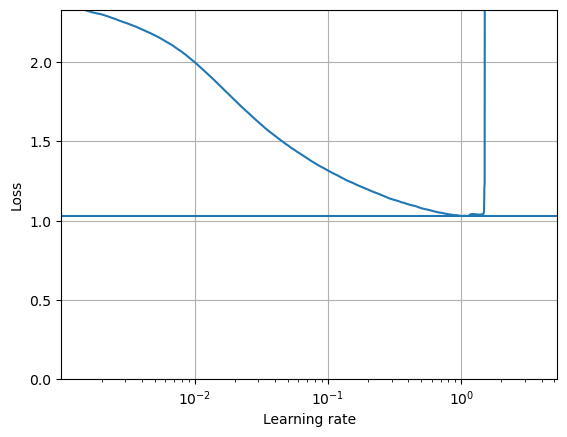

In [13]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss");

In [14]:
# 풀이에선 0.6부터 상승하여 0.3을 learning rate로 사용한다 하였는데
# 403쪽에서는 상승점보다 약 10배 낮은 지점이라 하여 min_rate/10을 비교
min_rate = expon_lr.rates[expon_lr.losses.index(min(expon_lr.losses))]
print(min_rate)

1.0150574


In [15]:
run_index = 1
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
print(run_logdir)

'.\\my_mnist_logs\\run_001'

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2324 - accuracy: 0.9282 - val_loss: 0.1057 - val_accuracy: 0.9674
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0953 - accuracy: 0.9700 - val_loss: 0.0873 - val_accuracy: 0.9738
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0643 - accuracy: 0.9796 - val_loss: 0.0831 - val_accuracy: 0.9760
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9837 - val_loss: 0.0765 - val_accuracy: 0.9780
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.0734 - val_accuracy: 0.9802
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0942 - val_accuracy: 0.9718
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0736 - val_ac

In [17]:
run_index = 2 # 실행할 때마다 이 값을 늘립니다
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=min_rate/10),
              metrics=["accuracy"])

history2 = model2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2653 - accuracy: 0.9208 - val_loss: 0.1399 - val_accuracy: 0.9566
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1070 - accuracy: 0.9668 - val_loss: 0.0945 - val_accuracy: 0.9716
Epoch 3/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0723 - accuracy: 0.9776 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0701 - val_accuracy: 0.9804
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0640 - val_accuracy: 0.9804
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0674 - val_accuracy: 0.9814
Epoch 7/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 0.0643 - val_a

In [18]:
print(model.evaluate(X_test, y_test), model2.evaluate(X_test, y_test))
# 3~4번 돌려봤는데 동일 및 최종 에폭 기준 0.3이 loss는 나쁘고 accuracy는 좋음

313/313 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9819
[0.09589528292417526, 0.9837999939918518] [0.07886345684528351, 0.9818999767303467]
